In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)
'''
make_classification:- creates an artificial dataset used for solving bin class problems
n_samples = number of datapoints requried
n_features = number of features
n_informative = number of informative features
n_redundant = number of redundant features
n_classes = number of classes, in case of bin class, its 2. in case of multiclass, it will be more than 2
n_clusters_per_class = number of clusters per class kept 1, i.e., one type of class forming only one cluster
random_state = ensuring that the everytime you run the code, values will remain the same. this allows easy debugging.
class_sep = ensures the data is well separated.
'''

'\nmake_classification:- creates an artificial dataset used for solving bin class problems\nn_samples = number of datapoints requried\nn_features = number of features\nn_informative = number of informative features\nn_redundant = number of redundant features\nn_classes = number of classes, in case of bin class, its 2. in case of multiclass, it will be more than 2\nn_clusters_per_class = number of clusters per class kept 1, i.e., one type of class forming only one cluster\nrandom_state = ensuring that the everytime you run the code, values will remain the same. this allows easy debugging. \nclass_sep = ensures the data is well separated. \n'

In [2]:
import matplotlib.pyplot as plt

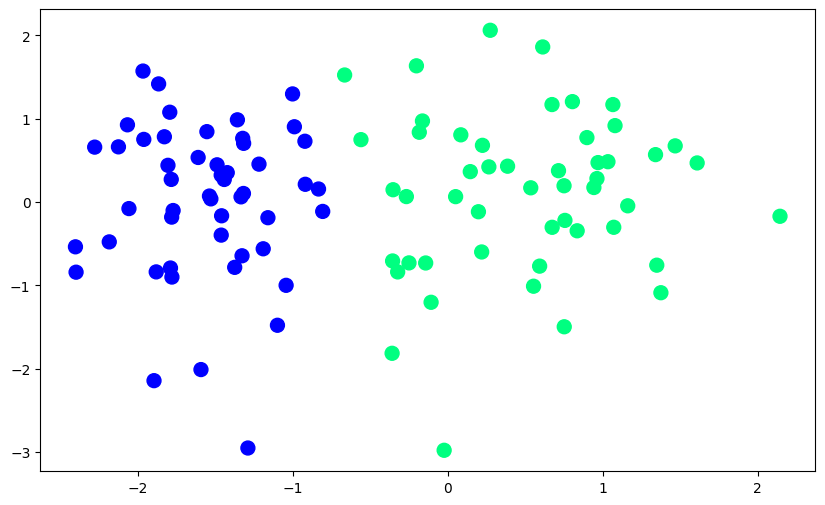

In [3]:

plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100) #X[:,0] means all the rows and just 0th column. this means we plotted all datapoints of the first feature

In [4]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1) #we inserted the bias being 1, as the 0th feature, because each perceptron has n features + 1 as bias being connected to the node.
    weights = np.ones(X.shape[1])#we make the array of weights. X.shape gives us [rows,columns] and we want no of weights = no of features = no of columns.
    #also, all the weights are initialized as 1.
    '''
    so, say we have 2 datapoints and 2 features. so, 2 by 2 matrix. the eqn of z = w0*1 + w1*x1 + w2*x2
    now, we wanted 1 to be multiplied to w0 (bias) everytime and hence we added 1 as the 0th column in the matrix. so matrix became 3 by 2, first column completely
    being 1.
    now, the weights are initialized and we have [1,1,1] with first 1 being bias and next ones being w1 an w2
    '''
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100) #random datapoint picked up
        y_hat = step(np.dot(X[j],weights)) #dot product gets us z, and we apply step function to it.
        weights = weights + lr*(y[j]-y_hat)*X[j] #updation of weights in case y[i] and y_hat are not matching

    return weights[0],weights[1:]

In [5]:
def step(z):
    return 1 if z>0 else 0

In [6]:
intercept_,coef_ = perceptron(X,y)

In [7]:
print(coef_)
print(intercept_)
'''
the weights and bias are the same for all the datapoints. so after the training, the weights and bias get fixed and these same weights and bias are used for
predicting predicting the outputs of all datapoints, being new or old.
'''

[1.3077827  0.22967233]
1.0


In [8]:
'''
ax + by + c = 0
by = -ax -c
y = -ax/b - c/b, we convert the above to this eqn of line.
so, a = coef[0] and b = coef[1], and c = intercept
'''
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [9]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b #eqn of line formed

(-3.0, 2.0)

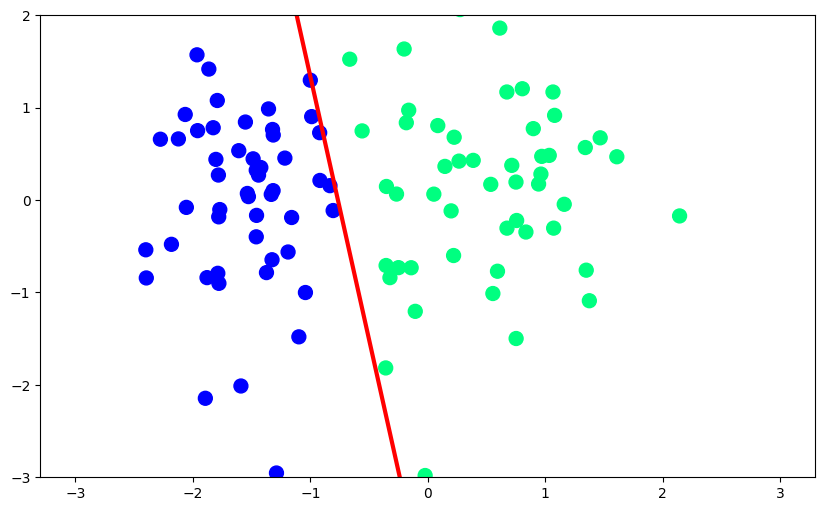

In [13]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3) #just plots the red line
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100) #plots the datapoints too
plt.ylim(-3,2) #for zooming in the graph